<a href="https://clarusway.com/contact-us/"><img align="center" src="https://i.ibb.co/B43qn24/officially-licensed-logo.png" alt="Open in Clarusway LMS" width="110" height="200" title="This notebook is licensed by Clarusway IT training school. Please contact the authorized persons about the conditions under which you can use or share."></a>

# TRAINING AND MODEL/ENDPOINT CREATION FROM NOTEBOOK

In [1]:
import pandas as pd      
import numpy as np 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/_param_validation.py:11: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 1.22.4)
  from scipy.sparse import csr_matrix, issparse


In [2]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print(" r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [3]:
train_data = pd.read_csv("train_data.csv")
test_data = pd.read_csv("test_data.csv")

In [4]:
train_data.shape

(12731, 6)

In [5]:
test_data.shape

(3183, 6)

In [6]:
train_data.head()

,price,age,hp_kW,km,Gearing_Type,make_model
0,26379,0.0,100.0,5900.0,Manual,Opel Insignia
1,18990,0.0,66.0,1900.0,Manual,Opel Astra
2,12480,2.0,81.0,39792.0,Manual,Opel Astra
3,34490,0.0,154.0,10.0,Automatic,Opel Insignia
4,15888,2.0,60.0,11903.0,Manual,Audi A1


In [7]:
test_data.head()

,price,age,hp_kW,km,Gearing_Type,make_model
0,14500,2.0,141.0,80000.0,Automatic,Audi A1
1,16790,3.0,66.0,16200.0,Automatic,Audi A1
2,15090,3.0,85.0,63668.0,Automatic,Audi A1
3,17990,2.0,70.0,16103.0,Automatic,Audi A1
4,17990,3.0,92.0,26415.0,Automatic,Audi A1


In [8]:
train_data.describe()

,price,age,hp_kW,km
count,12731.000000,12731.000000,12731.000000,12731.000000
mean,17996.286702,1.387244,88.382374,32002.454174
std,7349.138624,1.121765,26.693078,37081.360187
min,4950.000000,0.000000,40.000000,0.000000
25%,12850.000000,0.000000,66.000000,1699.500000
50%,16890.000000,1.000000,85.000000,20321.000000
75%,21910.000000,2.000000,101.000000,46375.000000
max,74600.000000,3.000000,294.000000,291800.000000


In [9]:
test_data.describe()

,price,age,hp_kW,km
count,3183.000000,3183.000000,3183.000000,3183.000000
mean,18133.550424,1.399623,88.968269,32441.995475
std,7509.562135,1.119744,26.602421,36567.088540
min,5450.000000,0.000000,51.000000,0.000000
25%,12880.000000,0.000000,66.000000,2970.500000
50%,16990.000000,1.000000,85.000000,20900.000000
75%,21900.000000,2.000000,103.000000,48000.000000
max,68320.000000,3.000000,294.000000,317000.000000


In [10]:
train_data.make_model.value_counts()

make_model
Audi A3           2488
Audi A1           2111
Opel Insignia     2044
Opel Astra        1995
Opel Corsa        1791
Renault Clio      1488
Renault Espace     786
Renault Duster      28
Name: count, dtype: int64

In [11]:
test_data.make_model.value_counts()

make_model
Audi A3           609
Opel Insignia     554
Opel Astra        530
Audi A1           503
Opel Corsa        425
Renault Clio      351
Renault Espace    205
Renault Duster      6
Name: count, dtype: int64

In [12]:
train_data.Gearing_Type.value_counts()

Gearing_Type
Manual            6496
Automatic         5861
Semi-automatic     374
Name: count, dtype: int64

# Split train_data into train and validation

In [13]:
X = train_data.drop(["price"], axis = 1)
y = train_data['price']

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=1)

In [15]:
X_train.head()

,age,hp_kW,km,Gearing_Type,make_model
8699,2.0,51.0,40000.0,Manual,Opel Corsa
5137,3.0,70.0,97976.0,Manual,Audi A1
536,1.0,66.0,14500.0,Manual,Audi A1
876,3.0,55.0,25329.0,Manual,Opel Corsa
8690,2.0,125.0,37125.0,Automatic,Opel Insignia


In [16]:
y_train.head()

8699     8900
5137    11490
536     16800
876      7899
8690    19499
Name: price, dtype: int64

In [17]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder

In [18]:
cat = X_train.select_dtypes("object").columns
cat

Index(['Gearing_Type', 'make_model'], dtype='object')

In [19]:
ord_enc = OrdinalEncoder()
column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough', verbose_feature_names_out=False).set_output(transform="pandas") # remainder: # Keep other columns rather than cat in original form.
                                                                                # remainder: # if you want to scale rest of cat columns use "minmax" instead passthrough
    
# Apply ord_enc to categoric variables and remain in original form rest of them.
# ord_enc for DT based algorithms
# For Linear reg, log reg vs. use one hot encoder 

In [20]:
train = column_trans.fit_transform(X_train)
validation = column_trans.transform(X_val)

In [21]:
train.head()

,Gearing_Type,make_model,age,hp_kW,km
8699,1.0,3.0,2.0,51.0,40000.0
5137,1.0,0.0,3.0,70.0,97976.0
536,1.0,0.0,1.0,66.0,14500.0
876,1.0,3.0,3.0,55.0,25329.0
8690,0.0,4.0,2.0,125.0,37125.0


In [22]:
train = pd.concat([pd.Series(y_train, index = X_train.index, name="price", dtype=int), train], axis=1)
validation = pd.concat([pd.Series(y_val, index = X_val.index, name="price", dtype=int), validation], axis=1)

In [23]:
train.head()

,price,Gearing_Type,make_model,age,hp_kW,km
8699,8900,1.0,3.0,2.0,51.0,40000.0
5137,11490,1.0,0.0,3.0,70.0,97976.0
536,16800,1.0,0.0,1.0,66.0,14500.0
876,7899,1.0,3.0,3.0,55.0,25329.0
8690,19499,0.0,4.0,2.0,125.0,37125.0


In [24]:
validation.head()

,price,Gearing_Type,make_model,age,hp_kW,km
3132,15480,0.0,2.0,3.0,100.0,56587.0
8123,24900,1.0,7.0,1.0,96.0,20000.0
10948,27400,0.0,0.0,0.0,85.0,10.0
1986,11975,1.0,2.0,2.0,74.0,38500.0
7487,12450,1.0,4.0,3.0,103.0,45000.0


In [25]:
train.to_csv('train.csv', index=False, header=False)
validation.to_csv('validation.csv', index=False, header=False)

In [26]:
# Import sagemaker and boto3 libraries.
import sagemaker, boto3
bucket = 'de08-inclass-hillary'
prefix = 'sm-autoscout-notebook'

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


In [27]:
sagemaker.__version__

'2.229.0'

In [28]:
# Loading train and validation datasets into S3 bucket.
boto3.Session().resource('s3').Bucket(bucket).Object(prefix + '/data/train.csv').upload_file('train.csv')
boto3.Session().resource('s3').Bucket(bucket).Object(prefix + '/data/validation.csv').upload_file('validation.csv')

In [29]:
# Checking the lists of objects in bucket
# We can check them also from AWS S3 console

! aws s3 ls {bucket}/{prefix}/data --recursive

2024-08-26 07:31:11     298744 sm-autoscout-notebook/data/train.csv
2024-08-26 07:31:11      99546 sm-autoscout-notebook/data/validation.csv


# Train Model

In [106]:
# %pip install --upgrade boto3  # if the following code raise an error, run this before then restart the kernel or define region name manually

In [30]:
# Defining the region and role variables which will be used for the connection to the AWS.
region = sagemaker.Session().boto_region_name  # region = boto3.Session().region_name
print("AWS Region: {}".format(region))

role = sagemaker.get_execution_role()
print("RoleArn:{}".format(role))

AWS Region: us-east-1
RoleArn:arn:aws:iam::046402772087:role/service-role/AmazonSageMaker-ExecutionRole-20240822T125482


In [31]:
from sagemaker.debugger import Rule, rule_configs

# The Debugger built-in rules monitor various common conditions that are critical for the success of a training job

In [32]:
# Defining output path in which outputs will be loaded during model training.
s3_output_location = 's3://{}/{}/{}'.format(bucket, prefix, 'autoscout_model')

In [33]:
# Defining built-in algorithm name and version which we will use for model creation.
container = sagemaker.image_uris.retrieve("xgboost", region, version="1.2-2")  # training code image for xgboost
print(container)

683313688378.dkr.ecr.us-east-1.amazonaws.com/sagemaker-xgboost:1.2-2


In [111]:
# for the latest version of xgboost
# container = sagemaker.image_uris.retrieve("xgboost", region, version="latest")
# print(container)

In [35]:
# help(sagemaker.image_uris.retrieve)

In [36]:
# Model creation using sagemaker estimator function

xgb_model = sagemaker.estimator.Estimator(
    container,
    role,
    instance_count=1,
    instance_type='ml.m4.xlarge',
    volume_size = 1, # GB
    output_path = s3_output_location,
    sagemaker_session=sagemaker.Session(),
    rules = [Rule.sagemaker(rule_configs.create_xgboost_report())]  # to see xgboost training metrics during model training
    )

In [114]:
#help(xgb_model.set_hyperparameters)

In [37]:
# Setting the model hyperparameters

xgb_model.set_hyperparameters(max_depth=4,
                              eta=0.3,
                              num_round=200,
                              objective = "reg:squarederror",  # objective = "reg:squarederror", "reg:linear" for latest xgboost!
                              early_stopping_rounds=10)  
                                                               

In [38]:
# Import training input method which will be used to prepare train and validation data before model training
from sagemaker.session import TrainingInput

# Preparing train and validation data for model training
train_input = TrainingInput(
's3://{}/{}/{}'.format(bucket, prefix, 'data/train.csv'), content_type='csv'
)

validation_input = TrainingInput(
's3://{}/{}/{}'.format(bucket, prefix, 'data/validation.csv'), content_type='csv'
)

In [39]:
# Convert the data we prepared into dictionary format for model training 
data_channels = {'train': train_input, 'validation': validation_input}

In [40]:
# Model training with data_channels. At this step training jobs will be created.
xgb_model.fit(data_channels)

# Let's check whether training job is created or not from AWS console.

# Let's check whether the output(model.tar.gz) occurs when training job is completed.

INFO:sagemaker:Creating training-job with name: sagemaker-xgboost-2024-08-26-07-46-18-145


2024-08-26 07:46:20 Starting - Starting the training job...
2024-08-26 07:46:42 Starting - Preparing the instances for trainingCreateXgboostReport: InProgress
...
2024-08-26 07:47:22 Downloading - Downloading input data...
2024-08-26 07:47:42 Downloading - Downloading the training image......
2024-08-26 07:48:42 Training - Training image download completed. Training in progress..[2024-08-26 07:48:52.047 ip-10-0-97-236.ec2.internal:7 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2024-08-26:07:48:52:INFO] Imported framework sagemaker_xgboost_container.training
[2024-08-26:07:48:52:INFO] Failed to parse hyperparameter objective value reg:squarederror to Json.
Returning the value itself
[2024-08-26:07:48:52:INFO] No GPUs detected (normal if no gpus installed)
[2024-08-26:07:48:52:INFO] Running XGBoost Sagemaker in algorithm mode
[2024-08-26:07:48:52:INFO] Determined delimiter of CSV input is ','
[2024-08-26:07:48:52:INFO] Determined delimiter of CSV input is ','
[2024-08-26:07:48:

In [41]:
# to get log-events-viewer-result.csv file,
# after completing the training job click on training job name on AWS console
# and view logs
model_rmse = pd.read_csv('log-events-viewer-result.csv', on_bad_lines='skip')
model_rmse.head(30)

,timestamp,message
0,1724658533790,[2024-08-26 07:48:52.047 ip-10-0-97-236.ec2.in...
1,1724658533790,[2024-08-26:07:48:52:INFO] Imported framework ...
2,1724658533790,[2024-08-26:07:48:52:INFO] Failed to parse hyp...
3,1724658533790,Returning the value itself
4,1724658533790,[2024-08-26:07:48:52:INFO] No GPUs detected (n...
5,1724658533790,[2024-08-26:07:48:52:INFO] Running XGBoost Sag...
6,1724658533790,[2024-08-26:07:48:52:INFO] Determined delimite...
7,1724658533790,[2024-08-26:07:48:52:INFO] Determined delimite...
8,1724658533790,[2024-08-26:07:48:52:INFO] Determined delimite...
9,1724658533790,[2024-08-26:07:48:52:INFO] Determined delimite...


In [42]:
model_rmse = model_rmse.iloc[19:].message.str.extract(r'.+[:](\d+\.\d).+[:](\d+\.\d)').astype('float')
model_rmse.rename(columns={0: "train_rmse", 1: "validation-rmse"}, inplace=True)
model_rmse

,train_rmse,validation-rmse
19,13806.9,13943.9
20,NaN,NaN
21,NaN,NaN
22,9944.5,10122.9
23,7250.1,7435.1
...,...,...
146,1602.2,1967.9
147,1599.6,1968.6
148,1597.5,1967.8
149,1595.5,1967.8


In [43]:
model_rmse.dropna(inplace=True)
model_rmse.head(10)

,train_rmse,validation-rmse
19,13806.9,13943.9
22,9944.5,10122.9
23,7250.1,7435.1
24,5439.7,5640.3
25,4245.3,4468.4
26,3427.6,3656.3
27,2933.2,3157.5
28,2625.6,2857.5
29,2453.9,2675.9
30,2343.8,2566.3


INFO:matplotlib.font_manager:generated new fontManager


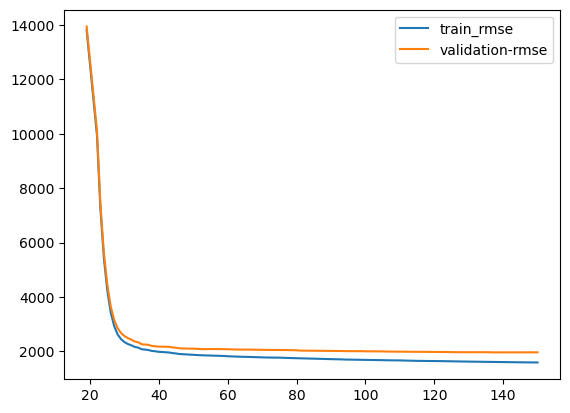

In [44]:
model_rmse.plot(kind='line');

# Create Endpoint

In [45]:
# CSVSerializer : Serialize data of various formats to a CSV-formatted string
              
from sagemaker.serializers import CSVSerializer

# Deploy the trained model into an endpoint
# At this step an endpoint will be created
predictor = xgb_model.deploy(initial_instance_count=1,  # the number of EC2 for endpoint
                             instance_type='ml.m5.xlarge',  # type of EC2
                            serializer = CSVSerializer())  # data format for prediction

# Let's check whether endpoint is created.

INFO:sagemaker:Creating model with name: sagemaker-xgboost-2024-08-26-08-21-09-886
INFO:sagemaker:Creating endpoint-config with name sagemaker-xgboost-2024-08-26-08-21-09-886
INFO:sagemaker:Creating endpoint with name sagemaker-xgboost-2024-08-26-08-21-09-886


-------!

In [46]:
# The name of the  endpoint we created
predictor.endpoint_name

'sagemaker-xgboost-2024-08-26-08-21-09-886'

# Prepare the test data

In [47]:
test_data.head()

,price,age,hp_kW,km,Gearing_Type,make_model
0,14500,2.0,141.0,80000.0,Automatic,Audi A1
1,16790,3.0,66.0,16200.0,Automatic,Audi A1
2,15090,3.0,85.0,63668.0,Automatic,Audi A1
3,17990,2.0,70.0,16103.0,Automatic,Audi A1
4,17990,3.0,92.0,26415.0,Automatic,Audi A1


In [48]:
X = test_data.drop(["price"], axis = 1)
y = test_data['price']

In [49]:
test=column_trans.transform(X)

In [50]:
test.head()

,Gearing_Type,make_model,age,hp_kW,km
0,0.0,0.0,2.0,141.0,80000.0
1,0.0,0.0,3.0,66.0,16200.0
2,0.0,0.0,3.0,85.0,63668.0
3,0.0,0.0,2.0,70.0,16103.0
4,0.0,0.0,3.0,92.0,26415.0


In [51]:
test.shape

(3183, 5)

In [52]:
test.to_csv('test.csv', index=False, header=False)

# Prediction using predictor (Method-1)

In [53]:
results = predictor.predict(test.to_numpy())

In [55]:
# results

In [56]:
results = np.fromstring(results, sep='\n')   #sep='\n' or sep=','

In [57]:
results

array([15970.21582031, 15887.58984375, 16116.35449219, ...,
       35987.32421875, 34214.22265625, 42065.0078125 ])

In [58]:
eval_metrics(y, results)

 r2_score: 0.9226945994208223 
 mae: 1257.1303233854658 
 mse: 4358154.293919976 
 rmse: 2087.6192885485552


In [59]:
test_data["predicted_price"] = results

In [60]:
test_data.sample(10, random_state=41)

,price,age,hp_kW,km,Gearing_Type,make_model,predicted_price
1846,13990,1.0,66.0,12099.0,Automatic,Opel Corsa,13578.894531
1671,12500,3.0,66.0,52000.0,Automatic,Opel Corsa,10880.681641
1497,13900,1.0,81.0,13149.0,Manual,Opel Astra,14091.145508
149,15950,3.0,66.0,53900.0,Semi-automatic,Audi A1,16133.251953
2352,16800,1.0,103.0,23401.0,Manual,Opel Insignia,18953.675781
3007,25490,2.0,147.0,49606.0,Automatic,Renault Espace,26104.083984
2114,15980,3.0,125.0,88346.0,Automatic,Opel Insignia,16086.406250
1805,8850,2.0,70.0,89000.0,Manual,Opel Corsa,8797.889648
1304,17400,2.0,110.0,62000.0,Automatic,Opel Astra,15223.293945
1256,10980,3.0,100.0,107791.0,Manual,Opel Astra,10500.507812


# Prediction using Endpoint Name (Method-2):

In [61]:
endpoint_name = predictor.endpoint_name
endpoint_name

'sagemaker-xgboost-2024-08-26-08-21-09-886'

In [62]:
# Reading and preparing the test data as payload for prediction
with open('test.csv', 'r') as f:
    payload = f.read().strip('\n')

In [63]:
# checking the content of payload
payload

'0.0,0.0,2.0,141.0,80000.0\n0.0,0.0,3.0,66.0,16200.0\n0.0,0.0,3.0,85.0,63668.0\n0.0,0.0,2.0,70.0,16103.0\n0.0,0.0,3.0,92.0,26415.0\n0.0,0.0,3.0,112.0,45764.0\n0.0,0.0,1.0,85.0,9752.0\n0.0,0.0,3.0,92.0,15850.0\n1.0,0.0,3.0,60.0,43120.0\n1.0,0.0,3.0,66.0,30500.0\n1.0,0.0,2.0,70.0,69500.0\n1.0,0.0,3.0,66.0,99000.0\n1.0,0.0,3.0,66.0,130000.0\n0.0,0.0,2.0,70.0,5108.0\n0.0,0.0,1.0,70.0,6396.0\n0.0,0.0,3.0,92.0,30952.0\n0.0,0.0,3.0,92.0,33991.0\n0.0,0.0,3.0,92.0,41900.0\n0.0,0.0,2.0,71.0,51484.0\n0.0,0.0,1.0,85.0,16500.0\n0.0,0.0,1.0,85.0,10013.0\n0.0,0.0,1.0,70.0,6695.0\n0.0,0.0,3.0,92.0,21275.0\n0.0,0.0,2.0,70.0,19800.0\n0.0,0.0,3.0,85.0,52000.0\n0.0,0.0,2.0,66.0,65000.0\n0.0,0.0,1.0,70.0,4800.0\n0.0,0.0,1.0,70.0,5500.0\n0.0,0.0,2.0,92.0,40000.0\n0.0,0.0,1.0,85.0,15000.0\n0.0,0.0,3.0,92.0,72624.0\n0.0,0.0,3.0,66.0,13960.0\n0.0,0.0,2.0,70.0,22980.0\n0.0,0.0,3.0,66.0,57926.0\n0.0,0.0,3.0,85.0,29800.0\n0.0,0.0,1.0,70.0,8600.0\n0.0,0.0,1.0,70.0,9463.0\n0.0,0.0,3.0,85.0,36709.0\n0.0,0.0,2.0,70.0

In [253]:
# payload="0.0,0.0,2.0,141.0,80000.0"     # by this one you can try a single value to be predicted

In [64]:
# Create sagemaker runtime object to send request to endpoint and get response
sagemaker_runtime = boto3.client("sagemaker-runtime", region_name=boto3.Session().region_name)

# Invoke endpoint to get prediction results
response = sagemaker_runtime.invoke_endpoint(
                            EndpointName=endpoint_name,  # endpoint name we created (should be unique)
                            Body=payload, # prediction data
                            ContentType = 'text/csv')  # type of data

# Optional - to see prediction result
# print(response['Body'].read().decode('utf-8'))

In [65]:
# The prediction result is in json format and "Body" key contains the prediction values.
 
results2 = response['Body'].read()   # results2 = response['Body'].read().decode('utf-8')

In [67]:
# results2

In [68]:
# prediction results(probability values) as numpy array
results2 = np.fromstring(results2, sep='\n')

In [69]:
results2

array([15970.21582031, 15887.58984375, 16116.35449219, ...,
       35987.32421875, 34214.22265625, 42065.0078125 ])

In [70]:
results2.shape

(3183,)

In [71]:
y.shape

(3183,)

In [72]:
eval_metrics(y, results2)

 r2_score: 0.9226945994208223 
 mae: 1257.1303233854658 
 mse: 4358154.293919976 
 rmse: 2087.6192885485552


In [73]:
test_data["predicted_price2"] = results2

In [74]:
test_data.sample(10, random_state=41)

,price,age,hp_kW,km,Gearing_Type,make_model,predicted_price,predicted_price2
1846,13990,1.0,66.0,12099.0,Automatic,Opel Corsa,13578.894531,13578.894531
1671,12500,3.0,66.0,52000.0,Automatic,Opel Corsa,10880.681641,10880.681641
1497,13900,1.0,81.0,13149.0,Manual,Opel Astra,14091.145508,14091.145508
149,15950,3.0,66.0,53900.0,Semi-automatic,Audi A1,16133.251953,16133.251953
2352,16800,1.0,103.0,23401.0,Manual,Opel Insignia,18953.675781,18953.675781
3007,25490,2.0,147.0,49606.0,Automatic,Renault Espace,26104.083984,26104.083984
2114,15980,3.0,125.0,88346.0,Automatic,Opel Insignia,16086.406250,16086.406250
1805,8850,2.0,70.0,89000.0,Manual,Opel Corsa,8797.889648,8797.889648
1304,17400,2.0,110.0,62000.0,Automatic,Opel Astra,15223.293945,15223.293945
1256,10980,3.0,100.0,107791.0,Manual,Opel Astra,10500.507812,10500.507812


# jason info:

In [79]:
import json

In [80]:
event = {
  "data": "0.0,0.0,2.0,141.0,80000.0"
}

data = json.loads(json.dumps(event))

payload = data["data"]
payload

'0.0,0.0,2.0,141.0,80000.0'

In [81]:
type(event)

dict

In [82]:
type(payload)

str

In [83]:
my_dict = {
    "age": 2,
    "hp_kW": 141,
    "km": 80000,
    'Gearing_Type':'Automatic',
    "make_model": 'Audi A1'}

In [84]:
df = pd.DataFrame.from_dict([my_dict])

In [86]:
df2 = column_trans.transform(df)

In [87]:
df2

,Gearing_Type,make_model,age,hp_kW,km
0,0.0,0.0,2,141,80000


In [88]:
df2.to_csv('df2.csv', index=False, header=False)

In [89]:
with open('df2.csv', 'r') as f:
    payload = f.read().strip('\n')

In [90]:
payload

'0.0,0.0,2,141,80000'

In [91]:
event = {
  "data": payload
  
}

In [92]:
event

{'data': '0.0,0.0,2,141,80000'}

In [93]:
# Create a low-level SageMaker service client.
sagemaker_client = boto3.client('sagemaker', region_name=region)

# Delete endpoint
sagemaker_client.delete_endpoint(EndpointName=endpoint_name)

{'ResponseMetadata': {'RequestId': '77c46e0d-ee7d-4ade-bd62-fbca9d7a8bbc',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '77c46e0d-ee7d-4ade-bd62-fbca9d7a8bbc',
   'content-type': 'application/x-amz-json-1.1',
   'date': 'Mon, 26 Aug 2024 08:39:22 GMT',
   'content-length': '0'},
  'RetryAttempts': 0}}

## Creating transformer file

In [173]:
ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough')

In [180]:
scaler = column_trans.fit(X)

In [181]:
import pickle
pickle.dump(scaler, open("transformer", 'wb'))

In [182]:
richard_transformer = pickle.load(open('transformer', 'rb'))

In [184]:
richard_transformer.transform(df)

array([[0.00e+00, 0.00e+00, 2.00e+00, 1.41e+02, 8.00e+04]])